##### Copyright 2025 Google LLC.

In [3]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Analyze a Video - Summarization

This notebook shows how you can use Gemini API's multimodal capabilities for video summarization.

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Analyze_a_Video_Summarization.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

In [4]:
%pip install -U -q "google-genai>=1.0.0"

## Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [5]:
from google.colab import userdata
from google import genai

API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=API_KEY)

## Example
This notebook will use [Wing It!](https://studio.blender.org/films/wing-it/) movie directed by Rik Schutte, wills falls under the [Creative Commons Attribution 4.0 License](https://creativecommons.org/licenses/by/4.0/deed.en).

See the full [credits](https://studio.blender.org/films/wing-it/pages/credits/) for all of the other people involved in its creation.

In [6]:
# Download video
path = "wingit.webm"
url = "https://upload.wikimedia.org/wikipedia/commons/3/38/WING_IT%21_-_Blender_Open_Movie-full_movie.webm"
!wget $url -O $path

--2025-03-04 13:58:23--  https://upload.wikimedia.org/wikipedia/commons/3/38/WING_IT%21_-_Blender_Open_Movie-full_movie.webm
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36196718 (35M) [video/webm]
Saving to: ‘wingit.webm’

wingit.webm         100%[===================>]  34.52M  27.4MB/s    in 1.3s    

2025-03-04 13:58:25 (27.4 MB/s) - ‘wingit.webm’ saved [36196718/36196718]



In [7]:
# Upload video
video_file = client.files.upload(file=path)

In [8]:
import time
# Wait until the uploaded video is available
while video_file.state.name == "PROCESSING":
  print('.', end='')
  time.sleep(5)
  video_file = client.files.get(name=video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)

....

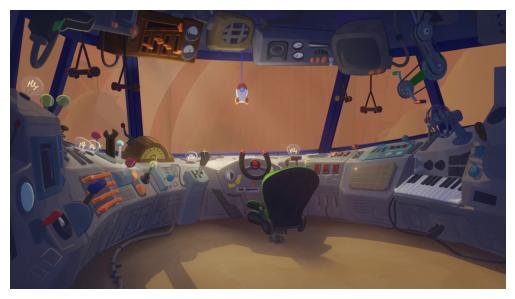

In [9]:
# this is only needed for demonstration purposes
import cv2
import matplotlib.pyplot as plt

# Display some of the video content
cap = cv2.VideoCapture(path)
frame_number = 1000
for _ in range(frame_number):
    ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

cap.release()

The video is now ready to be summarized by the model.

In [10]:
system_prompt = "You should provide a quick 2 or 3 sentence summary of what is happening in the video."

In [11]:
from google.genai import types

MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.5-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}
response = client.models.generate_content(
    model=f"models/{MODEL_ID}",
    contents=[
        "Summarise this video please.",
        video_file
        ],
    config=types.GenerateContentConfig(
        system_instruction=system_prompt,
        ),
    )
print(response.text)

Okay, here is a quick summary of what's happening in the video:

A cat and a dog are building a spaceship out of various objects lying around in a barn. They launch into space, but the ship starts falling apart almost immediately. They barely make it through the atmosphere before crash landing back into their barn.


The model correctly describes the plot of the short movie.

Now, you can delete the no longer necessary uploaded file.

In [12]:
# delete video
client.files.delete(name=video_file.name)

DeleteFileResponse()

### Important Note

Gemini API takes only one frame per second of the video. It may cause models not to see everything that is happening, especially if something is visible only for a fraction of a second.

## Summary

Now you know how you can use Gemini models to summarize what is happening in videos.

This notebook shows only one of many use cases. Check the [Video understanding](../quickstarts/Video_understanding.ipynb) notebook for more examples of using the Gemini API with videos.